# Ridge and Lasso Regression

In [70]:
# Load boston dataset 
from sklearn.datasets import load_boston

import warnings
warnings.simplefilter("ignore")

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = load_boston()
df
#below data not in  dataframe format

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [73]:
#convert data into DataFrame
dataset = pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
# assign the colunms name in dataset
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [75]:
#dependent feature
df.target.shape

(506,)

In [76]:
#create a new column price as dependent feature
dataset['price']=df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
dataset.shape

(506, 14)

In [78]:
# divided dataset into X and y 
X = dataset.drop(['price'],axis=1)
y = dataset['price']

In [79]:
#Splitting the dataset into the training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("X_train split data size ",X_train.shape)
print("X_test  split data size ",X_test.shape)
print("y_train split data size ",y_train.shape)
print("y_test  split data size ",y_test.shape)

X_train split data size  (404, 13)
X_test  split data size  (102, 13)
y_train split data size  (404,)
y_test  split data size  (102,)


## Linear regression 

In [80]:
# loading linear regression library
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regression=LinearRegression()
mse = cross_val_score(lin_regression,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.13180746769912


## Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
paramters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,50,55,100]}
ridge_regression=GridSearchCV(ridge,paramters,scoring='neg_mean_squared_error',cv=5)
ridge_regression.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [82]:
#find out best paramter
print(ridge_regression.best_params_)
#find out best score
print(ridge_regression.best_score_) #give a mean squared error

{'alpha': 100}
-29.9057019475403


## Lasso regression

In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
paramters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression=GridSearchCV(lasso,paramters,scoring='neg_mean_squared_error',cv=5)

lasso_regression.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [84]:
# find out best paramter
print(lasso_regression.best_params_)
# find out best score
print(lasso_regression.best_score_)

{'alpha': 1}
-35.53158022069486


In [85]:
#predict ridge and lasso regression 
predict_ridge=ridge_regression.predict(X_test)
predict_lasso=lasso_regression.predict(X_test)
print(predict_ridge)
print("-------------------------------------------------------------------")
print(predict_lasso)

[23.96675946 24.98996014 27.5915891  14.26059397 19.63842944 21.33417836
 21.32039718 23.27239931 20.30837677 19.48226179  6.4578138  14.28838187
 18.59820449  7.32675586 36.99591747 31.36360797 22.27052891 35.16096521
 30.99397818 24.25137539 25.40646048 24.34913685 20.21632652 30.0992825
 22.68378433 13.94885033 18.64684143 21.48729544 33.26170271 19.79217513
 18.17155893 19.9695722  20.42970393 23.50528313 28.90147149 20.77821424
 11.23603614 25.21197341 16.33605596 13.74459083 24.96162953 20.32082943
 21.56714797 16.00431973 22.631114   24.95003631 18.4770964  24.0302334
 12.20742324 24.00507962 21.73290773 17.56687132 24.74921266 28.65328508
 13.58721717 21.3260628  20.50282091 15.43442841 15.56550274 19.58519135
 18.94927305 21.87657392 31.86147714 31.60936099 18.30851646 31.83190056
 19.49024654 18.37266891 17.08246064 22.88948035 21.00301604 22.55678293
 30.73421263 29.37650392 25.53367669  5.7995898  35.17839807 23.37460756
 27.00341299 20.13591331 28.06232493 18.88117326 21.1

<AxesSubplot:xlabel='price', ylabel='Density'>

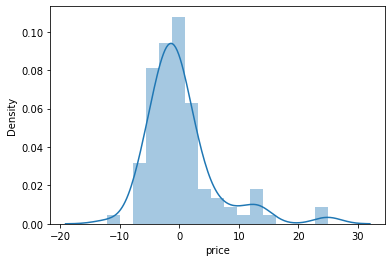

In [86]:
import seaborn as sns

sns.distplot(y_test-predict_ridge) # graph stable prity much compare lasso this looks more gernerize model

<AxesSubplot:xlabel='price', ylabel='Density'>

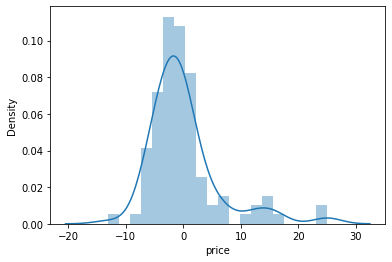

In [87]:
sns.distplot(y_test-predict_lasso)

<b>which is better lasso or ridge</b>
* The ridge is a bit easier to implement and faster to compute, which may matter depending on the type of data you have. 
* Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. ... The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.